In [1]:
import seaborn as sns
import pandas as pd
import scipy
import glob
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import trial
from analysis.map import Map
from analysis.persistence_diagram import PersistenceDiagram
from analysis.persistence_diagram import BettiNumbersGridVarianceMap, PixelDistinguishingPowerMap
import analysis.cosmologies as cosmologies
from analysis.emulator import GPREmulator, MLPREmulator

%load_ext autoreload
%autoreload 2

In [2]:
data_range = trial.find_max_min_values_maps()

print(data_range)

# TODO: compare SLICS variance with cosmoSLICS variance
# that is, compare los variance within SLICS to variance between different cosmologies

# SLICS determines the sample variance, will be a list of persistence diagrams for each line of sight
slics_pds = []
# cosmoSLICS is different cosmologies, will be a list of persistence diagrams for each cosmology
cosmoslics_pds = []
cosmoslics_uniq_pds = []

slics_maps = []
cosmoslics_maps = []

print('Analyzing maps...')
for dir in tqdm(glob.glob('maps/*')):
	if os.path.isdir(dir):
		cosm = dir.split('_')[-1]

		cosmoslics = 'Cosmo' in cosm

		curr_cosm_maps = []
		for i, map_path in enumerate(tqdm(glob.glob(f'{dir}/*.npy'), leave=False)):
			map = Map(map_path)
			map.get_persistence()
			curr_cosm_maps.append(map)

			perdi = PersistenceDiagram([map])

			# SLICS must be saved at LOS level
			if not cosmoslics:
				perdi.generate_betti_numbers_grids(resolution=100, data_ranges_dim=data_range)
				slics_pds.append(perdi)
				slics_maps.append(map)
			else:
				cosmoslics_uniq_pds.append(perdi)
				cosmoslics_maps.append(map)

		if len(curr_cosm_maps) > 0:
			perdi = PersistenceDiagram(curr_cosm_maps)
			# pd.generate_heatmaps(resolution=100, gaussian_kernel_size_in_sigma=3)
			# pd.add_average_lines()
			perdi.generate_betti_numbers_grids(resolution=100, data_ranges_dim=data_range)

			# perdi.plot()

			# cosmoSLICS must be saved at cosmology level
			if cosmoslics:
				cosmoslics_pds.append(perdi)

print('Calculating SLICS/cosmoSLICS variance maps...')
slics_bngs = {
	dim: [pd.betti_numbers_grids[dim] for pd in slics_pds] for dim in [0, 1]
}
cosmoslics_bngs = {
	dim: [pd.betti_numbers_grids[dim] for pd in cosmoslics_pds] for dim in [0, 1]
}

dim = 0
slics_bngvm_0 = BettiNumbersGridVarianceMap(slics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim)
slics_bngvm_0.save_figure(os.path.join('plots', 'slics'), title='SLICS variance, dim=0')
dim = 1
slics_bngvm_1 = BettiNumbersGridVarianceMap(slics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim)
slics_bngvm_1.save_figure(os.path.join('plots', 'slics'), title='SLICS variance, dim=1')

dim = 0
cosmoslics_bngvm_0 = BettiNumbersGridVarianceMap(cosmoslics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim)
cosmoslics_bngvm_0.save_figure(os.path.join('plots', 'cosmoslics'), title='cosmoSLICS variance, dim=0')
dim = 1
cosmoslics_bngvm_1 = BettiNumbersGridVarianceMap(cosmoslics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim)
cosmoslics_bngvm_1.save_figure(os.path.join('plots', 'cosmoslics'), title='cosmoSLICS variance, dim=1')

slics_pd = PersistenceDiagram(slics_maps)
slics_pd.generate_betti_numbers_grids(data_ranges_dim=data_range)

dist_powers = {}

for dim in [0, 1]:
	slics_var_map = BettiNumbersGridVarianceMap(slics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim)
	slics_var_map.save(os.path.join('products', 'bng_variance', 'slics'))
	slics_var_map.save_figure(os.path.join('plots', 'bng_variance', 'slics'))
	dist_power = PixelDistinguishingPowerMap([cpd.betti_numbers_grids[dim] for cpd in cosmoslics_pds], slics_pd.betti_numbers_grids[dim], slics_var_map, dimension=dim)
	dist_power.save(os.path.join('products', 'pixel_distinguishing_power'))
	dist_power.save_figure(os.path.join('plots', 'pixel_distinguishing_power'))

	dist_powers[dim] = dist_power

Determining max and min values in maps...
Found file with saved values, reading...
{0: [-0.05554313552952604, 0.03412921981880379], 1: [-0.029925435485797586, 0.07432709544723744]}
Analyzing maps...


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/218 [00:00<?, ?it/s]

Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosai

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Calculating SLICS/cosmoSLICS variance maps...
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology


/net/vdesk/data2/bach1/abbo/mrp/mrp/analysis/persistence_diagram.py:360: RuntimeWarning: divide by zero encountered in divide
  self.map = np.mean(np.square([cbng.map for cbng in cosmoslics_bngs] - slics_bng.map) / slics_variance.map, axis=0)
/net/vdesk/data2/bach1/abbo/mrp/mrp/analysis/persistence_diagram.py:360: RuntimeWarning: invalid value encountered in divide
  self.map = np.mean(np.square([cbng.map for cbng in cosmoslics_bngs] - slics_bng.map) / slics_variance.map, axis=0)


/net/vdesk/data2/bach1/abbo/mrp/mrp/conda_mrp/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


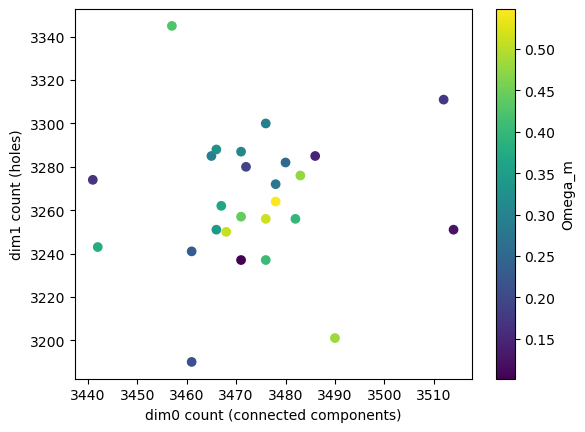

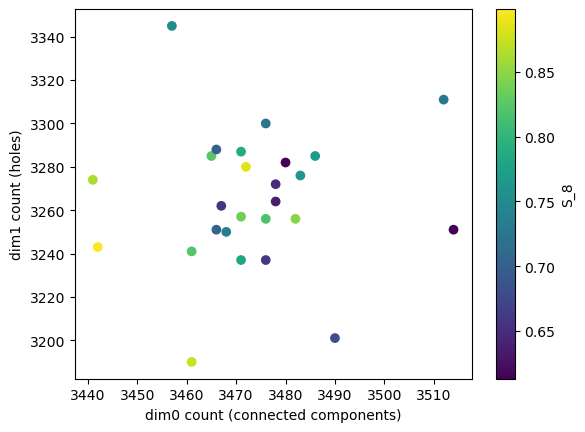

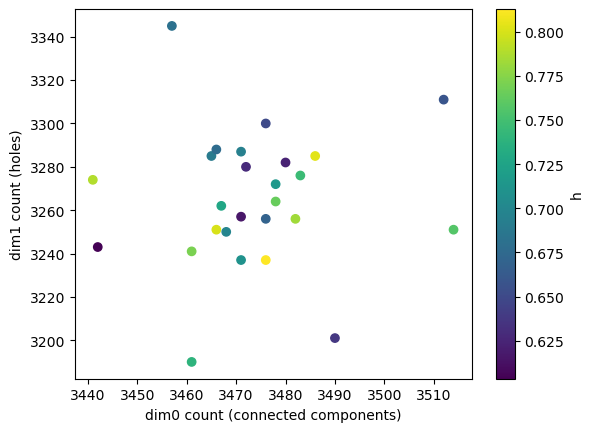

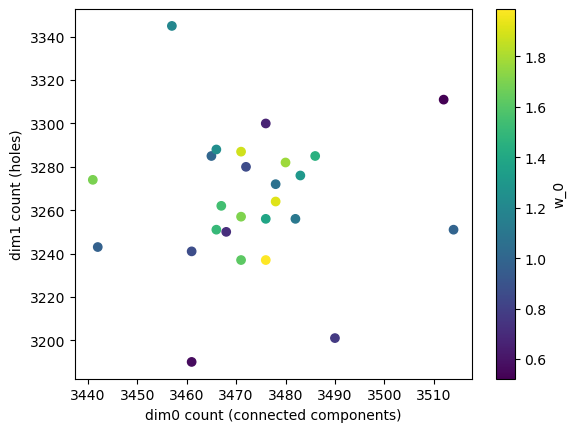

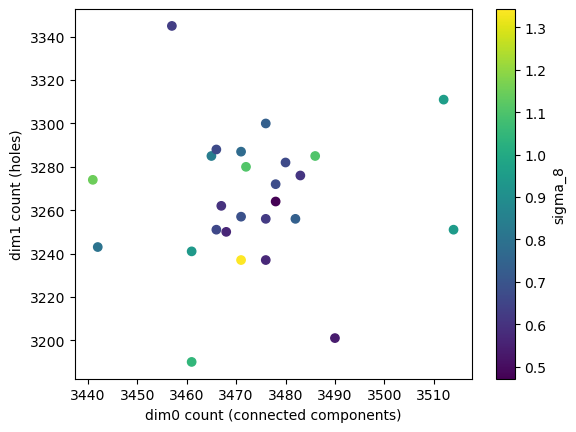

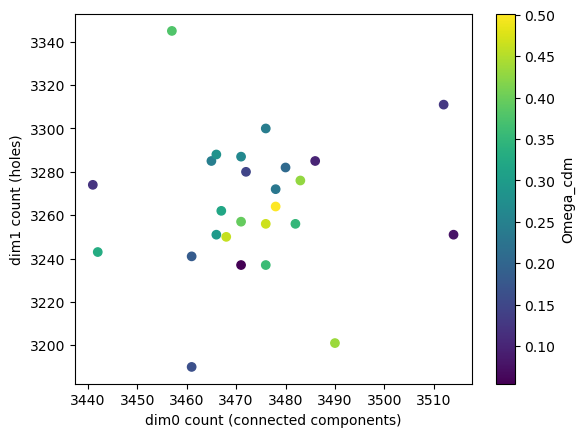

In [3]:
dim0_count = []
dim1_count = []
cosmology_ids = []

cosmologies_info_df = trial.read_cosmologies_info()

for cspd in cosmoslics_pds:
	# print(cspd.cosmology)
	cosmology_ids.append(cspd.cosmology_id)
	# print('dim 0 featurecount =', len(cspd.dimension_pairs[0]))
	dim0_count.append(len(cspd.dimension_pairs[0]))
	# print('dim 1 featurecount =', len(cspd.dimension_pairs[1]))
	dim1_count.append(len(cspd.dimension_pairs[1]))


for col in ['Omega_m', 'S_8', 'h', 'w_0', 'sigma_8', 'Omega_cdm']:
	fig, ax = plt.subplots()
	scax = ax.scatter(dim0_count, dim1_count, c=[cosmologies_info_df[cosmologies_info_df['id'] == id][col] for id in cosmology_ids])
	cbar = fig.colorbar(scax)
	cbar.set_label(f'{col}')
	ax.set_xlabel('dim0 count (connected components)')
	ax.set_ylabel('dim1 count (holes)')

	# fig, ax = plt.subplots()
	# ax.scatter(dim1_count, [cosmologies_info_df[cosmologies_info_df['id'] == id][col] for id in cosmology_ids])
	# ax.set_xlabel('dim1 count (holes)')
	# ax.set_ylabel(f'{col}')

In [4]:
for perdi in cosmoslics_pds:
	fig, ax = perdi.plot(close=False)

	S_8 = cosmologies_info_df[cosmologies_info_df['id'] == perdi.cosmology_id]['S_8'].values[0]

	ax.set_title(f'$S_8$={S_8}')
	fig.savefig(f'plots/perdis_vid/{S_8}.png')
	plt.close(fig)

In [5]:
fig, ax = plt.subplots()
ax.set_title('slics / cosmoslics variance, dim=0')
imax = ax.imshow((slics_bngvm_0.map / cosmoslics_bngvm_0.map)[::-1, :])
fig.colorbar(imax)
fig.savefig(os.path.join('plots', 'slics_cosmoslics_variance_0.png'))
plt.close(fig)

fig, ax = plt.subplots()
ax.set_title('slics / cosmoslics variance, dim=1')
imax = ax.imshow((slics_bngvm_1.map / cosmoslics_bngvm_1.map)[::-1, :])
fig.colorbar(imax)
fig.savefig(os.path.join('plots', 'slics_cosmoslics_variance_1.png'))
plt.close(fig)

cosmoslics_pd = PersistenceDiagram(cosmoslics_maps)
cosmoslics_pd.generate_betti_numbers_grids(data_ranges_dim=data_range)

cosmoslics_bngs = {
	dim: np.array([pd.betti_numbers_grids[dim].map for pd in cosmoslics_pds]) for dim in [0, 1]
}



/var/tmp/abbo/ipykernel_2023119/1902836019.py:3: RuntimeWarning: divide by zero encountered in divide
  imax = ax.imshow((slics_bngvm_0.map / cosmoslics_bngvm_0.map)[::-1, :])
/var/tmp/abbo/ipykernel_2023119/1902836019.py:3: RuntimeWarning: invalid value encountered in divide
  imax = ax.imshow((slics_bngvm_0.map / cosmoslics_bngvm_0.map)[::-1, :])
/var/tmp/abbo/ipykernel_2023119/1902836019.py:10: RuntimeWarning: divide by zero encountered in divide
  imax = ax.imshow((slics_bngvm_1.map / cosmoslics_bngvm_1.map)[::-1, :])
/var/tmp/abbo/ipykernel_2023119/1902836019.py:10: RuntimeWarning: invalid value encountered in divide
  imax = ax.imshow((slics_bngvm_1.map / cosmoslics_bngvm_1.map)[::-1, :])


In [6]:
# Try PersistenceDiagram transformation

def transform_subtract(old_pd, new_pd):
	new_pd.dimension_pairs = {
		dim: np.array([old_pd.dimension_pairs[dim][:, 0], old_pd.dimension_pairs[dim][:, 1] - old_pd.dimension_pairs[dim][:, 0]]).T
		for dim in [0, 1]
	}

def transform_square(old_pd, new_pd):
	new_pd.dimension_pairs = {
		dim: np.array([old_pd.dimension_pairs[dim][:, 0], np.square(old_pd.dimension_pairs[dim][:, 1])]).T
		for dim in [0, 1]
	}

def transform_subtract_both(old_pd, new_pd):
	new_pd.dimension_pairs = {
		dim: np.array([old_pd.dimension_pairs[dim][:, 0] - old_pd.dimension_pairs[dim][:, 1], old_pd.dimension_pairs[dim][:, 1] - old_pd.dimension_pairs[dim][:, 0]]).T
		for dim in [0, 1]
	}
	
def rotation_matrix(angle):
	c = np.cos(np.radians(angle))
	s = np.sin(np.radians(angle))
	return np.array([[c, -s], [s, c]])

def transform_rotate(old_pd, new_pd):
	new_pd.dimension_pairs = {
		dim: np.einsum('ij,kj->ki', rotation_matrix(-45), old_pd.dimension_pairs[dim]) for dim in [0, 1]
	}

def try_transforms_and_plot():
	for perdi in cosmoslics_pds:

		perdi.plot(close=False)

		for dim in [0, 1]:
			data = pd.DataFrame(data=perdi.dimension_pairs[dim], columns=['birth', 'death'])
			gr = sns.jointplot(data=data, x='birth', y='death')

			gr.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)

		for transform, name in zip(
			[transform_subtract, transform_rotate],
			['death-birth', 'rotate']
		):
		
			new_pd = PersistenceDiagram(perdi.maps, cosmology=f'{perdi.cosmology}_transformed_{name}')

			transform(perdi, new_pd)
			fig, ax = new_pd.plot(close=False)
			# ax.set_ylim(ymin=-0.005, ymax=0.06)
			ax.set_ylabel(name)

			fig.savefig(os.path.join('plots', 'persistence_diagrams', f'{new_pd.cosmology}.png'))

			# Make Jointplot for dim 0, 1 separately
			for dim in [0, 1]:
				data = pd.DataFrame(data=new_pd.dimension_pairs[dim], columns=['birth', name])
				gr = sns.jointplot(data=data, x='birth', y=name)

				gr.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)

				# TODO: fit skewed Gaussian to rotated data

		break

def rotate_perdis(perdis):
	new_perdis = []
	for perdi in perdis:
		new_perdi = PersistenceDiagram(perdi.maps, cosmology=f'{perdi.cosmology}_rotated')

		transform_rotate(perdi, new_perdi)

		new_perdis.append(new_perdi)
	
	return new_perdis


In [7]:
%%script false --no-raise-error

cosmoslics_pds_rot = rotate_perdis(cosmoslics_pds)

for perdi in cosmoslics_pds_rot:
	fig, ax = plt.subplots()
	ax.set_title(perdi.cosmology)

	fig, axv = plt.subplots()
	axv.set_title(perdi.cosmology)

	for dim in [0, 1]:
		ax.hist(perdi.dimension_pairs[dim][:, 0], bins=20)
		axv.hist(perdi.dimension_pairs[dim][:, 1], bins=20, orientation='horizontal')

In [8]:
%%script false --no-raise-error

try_transforms_and_plot()

In [9]:
def test_sklearn_method(method, varied_argument=None, plot_function=None, **method_args):

	if varied_argument is not None:
		varied_values = varied_argument['values']
		varied_name = varied_argument['name']
		ncols = len(varied_values)
	else:
		ncols = 1

	if plot_function is not None:
		fig, ax = plt.subplots(ncols=ncols, nrows=len(cosmoslics_pds), sharex=True, sharey=True, figsize=(16, 50))

	results = []

	for row, perdi in enumerate(cosmoslics_pds):
		if varied_argument is not None:
			results.append([])

		for col in range(ncols):
			if varied_argument is None:
				hdb = method(**method_args)
				results.append(method)
			else:
				curr_method_args = method_args.copy()
				curr_method_args[varied_name] = varied_values[col]
				hdb = method(**curr_method_args)
				results[-1].append(method)

			# Skip holes for now
			dim = 0

			hdb.fit(perdi.dimension_pairs[dim])
			if plot_function is not None:
				curr_ax = ax[row, col] if ncols > 1 else ax[row]

				plot_function(perdi, method, dim, curr_ax)
				if col == 0:
					curr_ax.set_title(perdi.cosmology)
				if col == 0 and varied_argument is not None:
					curr_ax.set_ylabel(f'{varied_name}={varied_values[col]}')
		
		fig.tight_layout()
	
	return results



In [10]:
%%script false --no-raise-error

def plot_aggclu(perdi, sklearn_method, dim, ax):
	ax.scatter(perdi.dimension_pairs[dim][:, 0], perdi.dimension_pairs[dim][:, 1], c=sklearn_method.labels_)

test_sklearn_method(AgglomerativeClustering, varied_argument={
	'name': 'n_clusters',
	'values': [2, 4, 6, 8, 9, 10]
}, plot_function=plot_aggclu)

In [11]:
%%script false --no-raise-error

test_sklearn_method(AgglomerativeClustering, n_clusters=8, varied_argument={
	'name': 'linkage',
	'values': ['ward', 'complete', 'average', 'single']
}, plot_function=plot_aggclu)

In [12]:
%%script false --no-raise-error

from sklearn.decomposition import PCA

def plot_pca(perdi, sklearn_method, dim, ax):
	ax.scatter(sklearn_method.components_[:, 0], sklearn_method.components_[:, 1])
	
test_sklearn_method(PCA, plot_function=plot_pca)

In [13]:
# Print pixel distinguishing power info

def find_local_maxima(rmap: PixelDistinguishingPowerMap, size=5):
	image = rmap.map
	image_shifts = []

	image_nonan = np.nan_to_num(image)

	for shift in range(1, size+1):
		for dir in [[1, 1], [1, 0], [0, 1], [-1, 1]]:
			for t in [-1, 1]:
				fsh = t * np.array(dir)
				shifted_image = np.roll(image_nonan, axis=(0, 1), shift=(shift * fsh[0], shift * fsh[1]))
				image_shifts.append(shifted_image)
	
	local_maxima = np.prod(np.greater(image, image_shifts), axis=0)
	local_maxima_indices = np.where(local_maxima)
	x_ind = local_maxima_indices[1]
	y_ind = local_maxima_indices[0]
	scatter_points = [rmap.get_axis_values('x')[x_ind], rmap.get_axis_values('y')[y_ind]]

	return local_maxima_indices, scatter_points

In [18]:
dim_best_pixels = {}

# Build training set with betti number peaks
training_set_peaks = {
	'name': 'betti_number_peaks',
	'input': [],
	'target_0': [],
	'target_1': []
}

for dim in [0, 1]:
	print(f'Dimension: {dim}')
	locmax, scatters = find_local_maxima(dist_powers[dim])

	dist_powers[dim].save_figure(os.path.join('plots', 'pixel_distinguishing_power'), scatter_points=scatters, save_name='peaks')

	dim_best_pixels[dim] = {
		'x_ind': locmax[1],
		'y_ind': locmax[0],
		'scatters': scatters
	}

for cpd in cosmoslics_pds:
	training_set_peaks['input'].append([val for key, val in cpd.cosm_parameters.items() if key != 'id'])
	training_set_peaks['target_0'].append(cpd.betti_numbers_grids[0]._transform_map()[dim_best_pixels[0]['x_ind'], dim_best_pixels[0]['y_ind']])
	training_set_peaks['target_1'].append(cpd.betti_numbers_grids[0]._transform_map()[dim_best_pixels[1]['x_ind'], dim_best_pixels[1]['y_ind']])

# Merge dimensions in target data
training_set_peaks['target'] = np.array([np.concatenate((t0, t1)) for t0, t1 in zip(training_set_peaks['target_0'], training_set_peaks['target_1'])])
training_set_peaks['input'] = np.array(training_set_peaks['input'])

Dimension: 0
Dimension: 1


In [15]:
# Build training set based on rotated Persistence Diagrams Histograms
cosmoslics_pds_rot = rotate_perdis(cosmoslics_pds)
training_set_histboth = {
	'name': 'histogram_both',
	'input': [],
	'target': []
}
training_set_histx = {
	'name': 'histogram_x',
	'input': [],
	'target': []
}

for perdi in cosmoslics_pds_rot:
	training_set_histboth['input'].append([val for key, val in cpd.cosm_parameters.items() if key != 'id'])
	training_set_histx['input'].append([val for key, val in cpd.cosm_parameters.items() if key != 'id'])

	curr_targ_both = []
	curr_targ_x = []

	for dim in [0, 1]:
		histx, _ = np.histogram(perdi.dimension_pairs[dim][:, 0], bins=20)
		histy, _ = np.histogram(perdi.dimension_pairs[dim][:, 1], bins=20)

		curr_targ_both.append(histx)
		curr_targ_both.append(histy)

		curr_targ_x.append(histx)

	training_set_histboth['target'].append(np.array(curr_targ_both).flatten())
	training_set_histx['target'].append(np.array(curr_targ_x).flatten())

/net/vdesk/data2/bach1/abbo/mrp/mrp/conda_mrp/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/net/vdesk/data2/bach1/abbo/mrp/mrp/conda_mrp/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/net/vdesk/data2/bach1/abbo/mrp/mrp/conda_mrp/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/net/vdesk/data2/bach1/abbo/mrp/mrp/conda_mrp/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

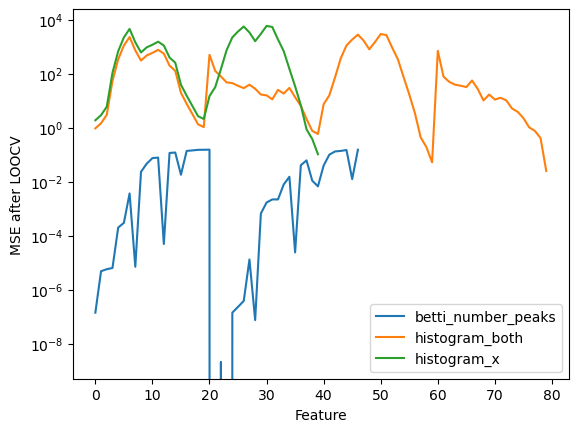

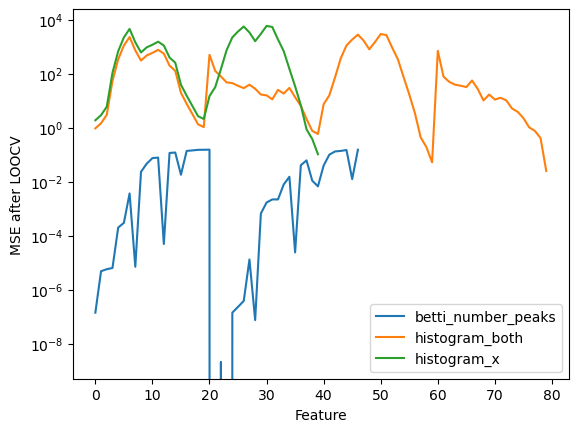

In [26]:



fig, ax_gpre = plt.subplots()
fig, ax_mlpre = plt.subplots()

training_sets = [training_set_peaks, training_set_histboth, training_set_histx]

for training_set in training_sets:
	gpre = GPREmulator(training_set)
	gpre_validation = gpre.validate()
	
	ax_gpre.plot(gpre_validation, label=training_set['name'])

	mlpre = MLPREmulator(training_set)
	mlpre_validation = mlpre.validate()
	
	ax_mlpre.plot(gpre_validation, label=training_set['name'])

ax_gpre.legend()
ax_mlpre.legend()

for ax in [ax_gpre, ax_mlpre]:
	ax.set_ylabel('MSE after LOOCV')
	ax.set_xlabel('Feature')
	ax.semilogy()


$$\mathrm{Pixel\ distinguishing\ power} = \frac{1}{N_\mathrm{cosmoSLICS}}\sum_{\mathrm{cosmoSLICS}}\frac{(\mathrm{BNG}_{i} - \mathrm{BNG_{SLICS}})^2}{\sigma_\mathrm{SLICS}}$$